# TITLE

In [1]:
import pandas as pd
import numpy as np
import statistics as stats
from  collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Explore Electric Vehicle Data for the State of Washington

In [2]:
electric_vehicle_df = pd.read_csv("./data/Electric_Vehicle_Population_Data.csv")

In [3]:
electric_vehicle_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
#Explore
print('Shape\n', electric_vehicle_df.shape)
print('\n')
print("Duplicates\n", electric_vehicle_df.duplicated().sum())
print('\n')
print('Null\n', electric_vehicle_df.isnull().sum())
print('\n')
print('Describe Numbers\n', electric_vehicle_df.describe())
print('\n')
print('Describe Strings\n', electric_vehicle_df.describe(include='object'))
print('\n')
print('Columns\n', electric_vehicle_df.columns)
print('\n')
print('Correlation\n', electric_vehicle_df.corr())

Shape
 (150482, 17)


Duplicates
 0


Null
 VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                           

C:\Users\riley\AppData\Local\Temp\ipykernel_476\2966570106.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Correlation\n', electric_vehicle_df.corr())


As we can see there are many 0 values throughout columns such as base MSRP and Electric Range, therefore, we will discard these columns as they are not relevant to our research. Additionally, location information is captured in several locations such as county, postal code, vehicle location, and 2020 Census Tract. We should only consider County from income data set as that is the only way to join the two.

We will begin first by dropping columns that have majority of 0 data and hard to work with location data. Then we will verify that all car data is from Washington.

In [5]:
electric_vehicle_df.drop(columns=["Electric Range", "Base MSRP", "Vehicle Location", "2020 Census Tract", 'VIN (1-10)', 'DOL Vehicle ID'], inplace=True)

In [6]:
print(electric_vehicle_df.loc[electric_vehicle_df['State'] != "WA"].count())

County                                               338
City                                                 338
State                                                341
Postal Code                                          338
Model Year                                           341
Make                                                 341
Model                                                341
Electric Vehicle Type                                341
Clean Alternative Fuel Vehicle (CAFV) Eligibility    341
Legislative District                                   0
Electric Utility                                     338
dtype: int64


In [7]:
electric_vehicle_df = electric_vehicle_df.loc[electric_vehicle_df['State'] == "WA"]

In [8]:
print(electric_vehicle_df['Legislative District'].isnull().sum())

0


In [9]:
electric_vehicle_df.drop(columns=["State", 'Legislative District'], inplace=True)

In [49]:
#Get Class Distributions
electric_vehicle_df_length = len(electric_vehicle_df["County"])
for col in electric_vehicle_df:
    count_counter = Counter(electric_vehicle_df[col])
    percent_values=[(i, count_counter[i[0]] / electric_vehicle_df_length) for i in count_counter.most_common()]
    print("Percent class distribution of ", col)
    print(percent_values)
    print('\n')

Percent class distribution of  County
[(('King', 79075), 0.5266715953670217), (('Snohomish', 17307), 0.11527164465402522), (('Pierce', 11542), 0.07687440472622402), (('Clark', 8849), 0.058937931677556434), (('Thurston', 5403), 0.03598617299738246), (('Kitsap', 4923), 0.032789178172517836), (('Spokane', 3690), 0.024576897716146823), (('Whatcom', 3668), 0.02443036878667386), (('Benton', 1800), 0.011988730593242352), (('Skagit', 1658), 0.011042952957553233), (('Island', 1640), 0.01092306565162081), (('Clallam', 920), 0.0061275734143238685), (('Jefferson', 875), 0.00582785514949281), (('Chelan', 863), 0.005747930278871194), (('San Juan', 844), 0.005621382567053636), (('Yakima', 835), 0.005561438914087425), (('Cowlitz', 762), 0.005075229284472595), (('Mason', 706), 0.004702246554905056), (('Lewis', 598), 0.003982922719310515), (('Grays Harbor', 533), 0.0035499963367767633), (('Franklin', 511), 0.0034034674073038012), (('Kittitas', 503), 0.003350184160222724), (('Grant', 452), 0.003010503460

array([[<Axes: title={'center': 'Model Year'}>]], dtype=object)

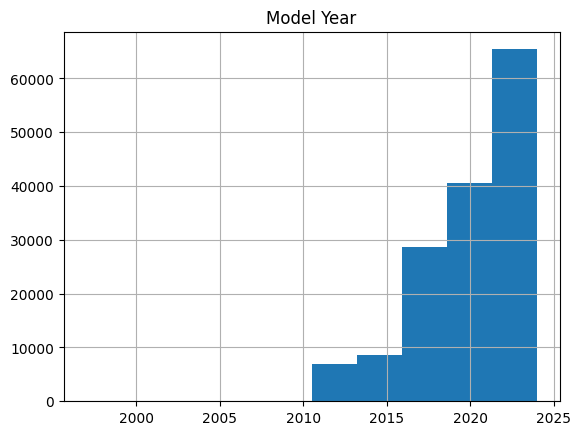

In [11]:
electric_vehicle_df.hist(column="Model Year")

## Explore Washington Income Data

In [12]:
income_df = pd.read_csv("./data/median_household_income_estimates.csv",  thousands=',')

In [13]:
income_df.head()

,Unnamed: 0,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Washington,31183.0,33417.0,34379.0,35882.0,36679.0,37895.0,38997.0,40568.0,42399.0,...,57284.0,60153.0,63439.0,65500.0,69288.0,72297.0,78674.0,80319.0,84155.0,86343.0
2,Adams,24604.0,28024.0,27301.0,28328.0,31277.0,29537.0,29604.0,31806.0,31795.0,...,43541.0,45712.0,47646.0,49501.0,48849.0,52870.0,53535.0,56421.0,57405.0,58406.0
3,Asotin,22897.0,24206.0,25110.0,26251.0,27359.0,27873.0,28288.0,29813.0,31499.0,...,42174.0,43368.0,46107.0,47020.0,51767.0,50746.0,54776.0,53377.0,56438.0,59675.0
4,Benton,32593.0,35012.0,37093.0,39228.0,41153.0,42790.0,42540.0,42817.0,44057.0,...,63710.0,63157.0,62071.0,62282.0,63502.0,67912.0,72847.0,75882.0,77339.0,78824.0


In [14]:
#Drop First row of Nan Values
income_df = income_df.iloc[1:]

#Transpose data to view by county and change header
income_df = income_df.T
income_df.columns = income_df.iloc[0]
income_df = income_df[1:]

#Drop Washington as it is the state average and not a county
income_df.drop(columns=["Washington"], inplace=True)

In [15]:

income_df.columns.names = ['Year']

In [16]:
income_df.head()

Year,Adams,Asotin,Benton,Chelan,Clallam,Clark,Columbia,Cowlitz,Douglas,Ferry,...,Skamania,Snohomish,Spokane,Stevens,Thurston,Wahkiakum,Walla Walla,Whatcom,Whitman,Yakima
1989,24604.0,22897.0,32593.0,24312.0,25434.0,31800.0,22418.0,27866.0,27054.0,25170.0,...,28778.0,36847.0,25769.0,24440.0,30976.0,26969.0,24414.0,28367.0,21674.0,23612.0
1990,28024.0,24206.0,35012.0,25833.0,27329.0,33734.0,24478.0,29746.0,28708.0,27355.0,...,31368.0,38820.0,27337.0,25609.0,33139.0,28590.0,25808.0,31097.0,22949.0,25484.0
1991,27301.0,25110.0,37093.0,27592.0,27861.0,34250.0,24123.0,31038.0,29407.0,27236.0,...,31000.0,39868.0,28355.0,26482.0,34851.0,28459.0,26242.0,31953.0,23735.0,25866.0
1992,28328.0,26251.0,39228.0,28746.0,28578.0,35847.0,26136.0,31195.0,30932.0,27841.0,...,31833.0,41670.0,29570.0,27519.0,36676.0,29655.0,27647.0,32599.0,24389.0,27085.0
1993,31277.0,27359.0,41153.0,30148.0,29340.0,37418.0,28123.0,31957.0,31855.0,27829.0,...,32283.0,42418.0,30482.0,28818.0,37766.0,31076.0,28902.0,32958.0,25162.0,28079.0


In [17]:
#Explore
print('Shape\n', income_df.shape)
print('\n')
print("Duplicates\n", income_df.duplicated().sum())
print('\n')
print('Null\n', income_df.isnull().sum())
print('\n')
print('Describe Numbers\n', income_df.describe())
print('\n')
print('Describe Strings\n', income_df.describe(include='object'))
print('\n')
print('Columns\n', income_df.columns)
print('\n')
print('Correlation\n', income_df.corr())

Shape
 (34, 39)


Duplicates
 0


Null
 Year
Adams           0
Asotin          0
Benton          0
Chelan          0
Clallam         0
Clark           0
Columbia        0
Cowlitz         0
Douglas         0
Ferry           0
Franklin        0
Garfield        0
Grant           0
Grays Harbor    0
Island          0
Jefferson       0
King            0
Kitsap          0
Kittitas        0
Klickitat       0
Lewis           0
Lincoln         0
Mason           0
Okanogan        0
Pacific         0
Pend Oreille    0
Pierce          0
San Juan        0
Skagit          0
Skamania        0
Snohomish       0
Spokane         0
Stevens         0
Thurston        0
Wahkiakum       0
Walla Walla     0
Whatcom         0
Whitman         0
Yakima          0
dtype: int64


Describe Numbers
 Year      Adams   Asotin   Benton   Chelan  Clallam    Clark  Columbia  \
count      34.0     34.0     34.0     34.0     34.0     34.0      34.0   
unique     34.0     34.0     34.0     34.0     34.0     34.0      34.0  

C:\Users\riley\AppData\Local\Temp\ipykernel_476\2936552886.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Correlation\n', income_df.corr())


In [47]:
#Get Class Distributions
income_df_length = len(income_df["Adams"])
for col in income_df:
    count_counter = Counter(income_df[col])
    percent_values=[(i, count_counter[i[0]] / income_df_length) for i in count_counter.most_common()]
    print("Percent class distribution of ", col)
    print(percent_values)
    print('\n')

Percent class distribution of  Adams
[((24604.0, 1), 0.029411764705882353), ((28024.0, 1), 0.029411764705882353), ((27301.0, 1), 0.029411764705882353), ((28328.0, 1), 0.029411764705882353), ((31277.0, 1), 0.029411764705882353), ((29537.0, 1), 0.029411764705882353), ((29604.0, 1), 0.029411764705882353), ((31806.0, 1), 0.029411764705882353), ((31795.0, 1), 0.029411764705882353), ((34073.0, 1), 0.029411764705882353), ((33888.0, 1), 0.029411764705882353), ((35292.0, 1), 0.029411764705882353), ((37839.0, 1), 0.029411764705882353), ((38306.0, 1), 0.029411764705882353), ((38934.0, 1), 0.029411764705882353), ((39235.0, 1), 0.029411764705882353), ((39105.0, 1), 0.029411764705882353), ((41298.0, 1), 0.029411764705882353), ((42299.0, 1), 0.029411764705882353), ((42455.0, 1), 0.029411764705882353), ((41102.0, 1), 0.029411764705882353), ((40656.0, 1), 0.029411764705882353), ((41068.0, 1), 0.029411764705882353), ((42354.0, 1), 0.029411764705882353), ((43541.0, 1), 0.029411764705882353), ((45712.0, 1

# Charing Stations in Washington

In [19]:
charging_stations_df = pd.read_csv("./data/alt_fuel_stations (Oct 1 2023).csv")

In [20]:
charging_stations_df.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,EV Workplace Charging
0,ELEC,City of Lacey - City Hall Parking,420 College St,"At 3rd Ave SE, next to police station",Lacey,WA,98503,NaN,360-491-3214,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False
1,ELEC,Seattle-Tacoma International Airport - General...,17801 Pacific Hwy S,"5th floor parking garage; rows D, G, and I",Seattle,WA,98188,NaN,206-787-5388,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False
2,ELEC,Avista Corp,1411 E Mission Ave,NaN,Spokane,WA,99252,NaN,509-489-0500,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False
3,ELEC,Steam Plant Parking,130 S Post St,NaN,Spokane,WA,99201,NaN,800-227-9187,E,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False
4,ELEC,BELLEVUE BELLEVUE CH 1,450 110th Ave NE,NaN,Bellevue,WA,98004,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [21]:
#Explore
print('Shape\n', charging_stations_df.shape)
print('\n')
print("Duplicates\n", charging_stations_df.duplicated().sum())
print('\n')
print('Null\n', charging_stations_df.isnull().sum())
print('\n')
print('Describe Numbers\n', charging_stations_df.describe())
print('\n')
print('Describe Strings\n', charging_stations_df.describe(include='object'))
print('\n')
print('Columns\n', charging_stations_df.columns)
print('\n')
print('Correlation\n', charging_stations_df.corr())

Shape
 (2283, 74)


Duplicates
 0


Null
 Fuel Type Code                                0
Station Name                                  0
Street Address                                3
Intersection Directions                    2166
City                                          0
                                           ... 
NPS Unit Name                              2267
CNG Station Sells Renewable Natural Gas    2283
LNG Station Sells Renewable Natural Gas    2283
Maximum Vehicle Class                      2033
EV Workplace Charging                         0
Length: 74, dtype: int64


Describe Numbers
        Plus4  BD Blends  NG Fill Type Code  NG PSI  EV Level1 EVSE Num  \
count    0.0        0.0                0.0     0.0           59.000000   
mean     NaN        NaN                NaN     NaN            5.576271   
std      NaN        NaN                NaN     NaN           16.547949   
min      NaN        NaN                NaN     NaN            1.000000   
25%      NaN   

C:\Users\riley\AppData\Local\Temp\ipykernel_476\4054818737.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Correlation\n', charging_stations_df.corr())


In [22]:
charging_stations_df.dropna(axis=1, inplace=True)
charging_stations_df.head()

,Fuel Type Code,Station Name,City,State,ZIP,Status Code,Groups With Access Code,EV Network,Geocode Status,Latitude,Longitude,ID,Updated At,EV Connector Types,Country,Groups With Access Code (French),Access Code,EV Workplace Charging
0,ELEC,City of Lacey - City Hall Parking,Lacey,WA,98503,E,Public,Non-Networked,200-9,47.044011,-122.822404,33351,2023-02-14 15:54:11 UTC,J1772,US,Public,public,False
1,ELEC,Seattle-Tacoma International Airport - General...,Seattle,WA,98188,E,Public,Non-Networked,200-8,47.443377,-122.296229,33717,2023-08-10 16:58:49 UTC,NEMA520,US,Public,public,False
2,ELEC,Avista Corp,Spokane,WA,99252,E,Public,Non-Networked,GPS,47.673347,-117.388933,35620,2023-06-12 16:56:16 UTC,J1772 NEMA520,US,Public,public,False
3,ELEC,Steam Plant Parking,Spokane,WA,99201,E,Public,Non-Networked,GPS,47.655792,-117.423664,35621,2023-04-06 17:17:01 UTC,J1772,US,Public,public,False
4,ELEC,BELLEVUE BELLEVUE CH 1,Bellevue,WA,98004,E,Public,ChargePoint Network,GPS,47.614744,-122.193162,37181,2023-10-01 00:24:57 UTC,J1772,US,Public,public,False


In [24]:
#Drop colums:
#fuel type code, status code, groups with access code, state, country, access code because they are all same
#Station Name, Street Address, geocode, latitude, longitude, as we will use city or zip data
#ID, updated at are irrelevant
charging_stations_df.drop(columns=['Fuel Type Code', 'Station Name', 'State', 'Status Code', 'Groups With Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'ID', 'Updated At', 'Country', 'Groups With Access Code (French)', 'Access Code'], inplace=True)

In [25]:
charging_stations_df

,City,ZIP,EV Network,EV Connector Types,EV Workplace Charging
0,Lacey,98503,Non-Networked,J1772,False
1,Seattle,98188,Non-Networked,NEMA520,False
2,Spokane,99252,Non-Networked,J1772 NEMA520,False
3,Spokane,99201,Non-Networked,J1772,False
4,Bellevue,98004,ChargePoint Network,J1772,False
...,...,...,...,...,...
2278,Seattle,98109,ChargePoint Network,J1772,False
2279,Seattle,98109,ChargePoint Network,J1772,False
2280,Seattle,98109,ChargePoint Network,J1772,False
2281,Seattle,98109,ChargePoint Network,J1772,False


In [26]:
#Explore
print('Shape\n', charging_stations_df.shape)
print('\n')
print("Duplicates\n", charging_stations_df.duplicated().sum())
print('\n')
print('Null\n', charging_stations_df.isnull().sum())
print('\n')
print('Describe Numbers\n', charging_stations_df.describe())
print('\n')
print('Describe Strings\n', charging_stations_df.describe(include='object'))
print('\n')
print('Columns\n', charging_stations_df.columns)
print('\n')
print('Correlation\n', charging_stations_df.corr())

Shape
 (2283, 5)


Duplicates
 1345


Null
 City                     0
ZIP                      0
EV Network               0
EV Connector Types       0
EV Workplace Charging    0
dtype: int64


Describe Numbers
            City    ZIP           EV Network EV Connector Types  \
count      2283   2283                 2283               2283   
unique      226    321                   17                 15   
top     Seattle  98004  ChargePoint Network              J1772   
freq        565    163                 1077               1820   

       EV Workplace Charging  
count                   2283  
unique                     2  
top                    False  
freq                    2247  


Describe Strings
            City    ZIP           EV Network EV Connector Types
count      2283   2283                 2283               2283
unique      226    321                   17                 15
top     Seattle  98004  ChargePoint Network              J1772
freq        565    163        

C:\Users\riley\AppData\Local\Temp\ipykernel_476\4054818737.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Correlation\n', charging_stations_df.corr())


In [48]:
#Class distribution

charging_stations_df_length = len(charging_stations_df["City"])
for row in charging_stations_df:
    count_counter = Counter(charging_stations_df[row])
    percent_values=[(i, (count_counter[i[0]] / charging_stations_df_length)) for i in count_counter.most_common()]
    print("Percent class distribution of ", row)
    print(percent_values)
    print('\n')

Percent class distribution of  City
[(('Seattle', 565), 0.2474813841436706), (('Bellevue', 270), 0.11826544021024968), (('Tacoma', 101), 0.04424003504161191), (('Spokane', 58), 0.025405168637757335), (('Vancouver', 57), 0.024967148488830485), (('Richland', 53), 0.023215067893123085), (('Renton', 50), 0.021901007446342532), (('Olympia', 46), 0.02014892685063513), (('Bellingham', 38), 0.016644765659220323), (('Kirkland', 37), 0.016206745510293472), (('Issaquah', 33), 0.01445466491458607), (('Redmond', 31), 0.01357862461673237), (('Everett', 31), 0.01357862461673237), (('Bothell', 27), 0.011826544021024968), (('Puyallup', 25), 0.010950503723171266), (('Lynnwood', 25), 0.010950503723171266), (('Silverdale', 24), 0.010512483574244415), (('Walla Walla', 22), 0.009636443276390714), (('Ridgefield', 22), 0.009636443276390714), (('Bremerton', 21), 0.009198423127463863), (('Lacey', 20), 0.008760402978537012), (('Yakima', 20), 0.008760402978537012), (('Auburn', 19), 0.008322382829610162), (('Wenat

# Sales of Hybrids, Electric Nationwide

In [51]:
ev_sales_nation_df = pd.read_csv('./data/Pocket_Guide_to_Transportation.csv')

In [52]:
ev_sales_nation_df.head()

,Visualization ID,Mode,Statistic,Year,Value,Units,Percent,Fiscal Year,% Change from Previous Year,Statistic Short Name
0,07_08_01,NaN,HEV,2000,9.4,Number of Personal Vehicles (Thousands),NaN,2000,NaN,Sales of Hybrids
1,07_08_01,NaN,HEV,2001,20.3,Number of Personal Vehicles (Thousands),NaN,2001,NaN,Sales of Hybrids
2,07_08_01,NaN,HEV,2002,36.0,Number of Personal Vehicles (Thousands),NaN,2002,NaN,Sales of Hybrids
3,07_08_01,NaN,HEV,2003,47.6,Number of Personal Vehicles (Thousands),NaN,2003,NaN,Sales of Hybrids
4,07_08_01,NaN,HEV,2004,84.2,Number of Personal Vehicles (Thousands),NaN,2004,NaN,Sales of Hybrids


In [53]:
ev_sales_nation_df.dropna(axis=1, how='all', inplace=True)
ev_sales_nation_df.head()

,Visualization ID,Statistic,Year,Value,Units,Fiscal Year,Statistic Short Name
0,07_08_01,HEV,2000,9.4,Number of Personal Vehicles (Thousands),2000,Sales of Hybrids
1,07_08_01,HEV,2001,20.3,Number of Personal Vehicles (Thousands),2001,Sales of Hybrids
2,07_08_01,HEV,2002,36.0,Number of Personal Vehicles (Thousands),2002,Sales of Hybrids
3,07_08_01,HEV,2003,47.6,Number of Personal Vehicles (Thousands),2003,Sales of Hybrids
4,07_08_01,HEV,2004,84.2,Number of Personal Vehicles (Thousands),2004,Sales of Hybrids


In [54]:
#Drop Visualization ID(irrelevant), units (Consistent), and statistic short name (consistent)
ev_sales_nation_df.drop(columns=['Visualization ID', 'Units', 'Statistic Short Name'], inplace=True)
#Multiply by 1000 to account for units, change to int to remove trailing .0
ev_sales_nation_df['Value'] = (ev_sales_nation_df['Value']*1000).astype(int)

In [60]:
#Explore
print('Shape\n', ev_sales_nation_df.shape)
print('\n')
print("Duplicates\n", ev_sales_nation_df.duplicated().sum())
print('\n')
print('Null\n', ev_sales_nation_df.isnull().sum())
print('\n')
print('Describe Numbers\n', ev_sales_nation_df.describe())
print('\n')
print('Describe Strings\n', ev_sales_nation_df.describe(include='object'))
print('\n')
print('Columns\n', ev_sales_nation_df.columns)
print('\n')
print('Correlation\n', ev_sales_nation_df.corr())

Shape
 (45, 4)


Duplicates
 0


Null
 Statistic      0
Year           0
Value          0
Fiscal Year    0
dtype: int64


Describe Numbers
               Year          Value  Fiscal Year
count    45.000000      45.000000    45.000000
mean   2013.177778  199368.888889  2013.177778
std       5.737789  179454.098743     5.737789
min    2000.000000     300.000000  2000.000000
25%    2010.000000   49000.000000  2010.000000
50%    2014.000000  123900.000000  2014.000000
75%    2018.000000  338100.000000  2018.000000
max    2021.000000  799000.000000  2021.000000


Describe Strings
        Statistic
count         45
unique         3
top          HEV
freq          22


Columns
 Index(['Statistic', 'Year', 'Value', 'Fiscal Year'], dtype='object')


Correlation
                  Year     Value  Fiscal Year
Year         1.000000  0.354075     1.000000
Value        0.354075  1.000000     0.354075
Fiscal Year  1.000000  0.354075     1.000000


C:\Users\riley\AppData\Local\Temp\ipykernel_476\3700387306.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Correlation\n', ev_sales_nation_df.corr())


In [55]:
ev_sales_nation_df.head()

,Statistic,Year,Value,Fiscal Year
0,HEV,2000,9400,2000
1,HEV,2001,20300,2001
2,HEV,2002,36000,2002
3,HEV,2003,47600,2003
4,HEV,2004,84200,2004


In [62]:
#Class distribution

ev_sales_nation_df_length = len(ev_sales_nation_df["Value"])
for row in ev_sales_nation_df:
    count_counter = Counter(ev_sales_nation_df[row])
    percent_values=[(i, (count_counter[i[0]] / ev_sales_nation_df_length)) for i in count_counter.most_common()]
    print("Percent class distribution of ", row)
    print(percent_values)
    print('\n')

Percent class distribution of  Statistic
[(('HEV', 22), 0.4888888888888889), (('PHEV', 12), 0.26666666666666666), (('BEV', 11), 0.24444444444444444)]


Percent class distribution of  Year
[((2011, 3), 0.06666666666666667), ((2012, 3), 0.06666666666666667), ((2013, 3), 0.06666666666666667), ((2014, 3), 0.06666666666666667), ((2015, 3), 0.06666666666666667), ((2016, 3), 0.06666666666666667), ((2017, 3), 0.06666666666666667), ((2018, 3), 0.06666666666666667), ((2019, 3), 0.06666666666666667), ((2020, 3), 0.06666666666666667), ((2021, 3), 0.06666666666666667), ((2010, 2), 0.044444444444444446), ((2000, 1), 0.022222222222222223), ((2001, 1), 0.022222222222222223), ((2002, 1), 0.022222222222222223), ((2003, 1), 0.022222222222222223), ((2004, 1), 0.022222222222222223), ((2005, 1), 0.022222222222222223), ((2006, 1), 0.022222222222222223), ((2007, 1), 0.022222222222222223), ((2008, 1), 0.022222222222222223), ((2009, 1), 0.022222222222222223)]


Percent class distribution of  Value
[((9400, 1), 

In [59]:
print(ev_sales_nation_df.shape)

(45, 4)


# Handle Collinearity of Data

In [210]:
#Reference: Marcin Rutecki
#https://www.kaggle.com/code/marcinrutecki/multicollinearity-detection-and-remedies/notebook

# Runs through a dataframe of numerical variables to determine collinearity and drop columns that are >5 in VIF
# df must be only numerical data

def collinearity(df, vif_threshold=5):
    flag=True
    i=0
    
    while(flag==True):
        i+=1

        vif2_data = pd.DataFrame()
        vif2_data["Feature"] = df.columns
        
        # calculating VIF for each feature
        vif2_data["VIF"] = [variance_inflation_factor(df.values, i)
                                for i in range(len(df.columns))]
        
        print('VIF RUN ', i, ':')
        print(vif2_data)

        if max(vif2_data['VIF']) < vif_threshold:
            return df
        
        to_remove = (vif2_data.loc[vif2_data['VIF'] == max(vif2_data['VIF'])])
        print("Removing because of high VIF:\n", to_remove)
        x = to_remove.Feature.values[0]
        df.drop(columns=[x], inplace=True)

    return df.columns

### Electric Vehicle Population Collinearity

In [217]:
print(electric_vehicle_df.head())

     County      City  Postal Code  Model Year     Make           Model  \
0      King   Seattle      98103.0        2020  HYUNDAI            KONA   
1      King   Bothell      98011.0        2022     JEEP  GRAND CHEROKEE   
2    Yakima    Yakima      98908.0        2023     JEEP  GRAND CHEROKEE   
3      King  Kirkland      98034.0        2018    TESLA         MODEL 3   
4  Thurston   Olympia      98501.0        2018      BMW              I3   

                    Electric Vehicle Type  \
0          Battery Electric Vehicle (BEV)   
1  Plug-in Hybrid Electric Vehicle (PHEV)   
2  Plug-in Hybrid Electric Vehicle (PHEV)   
3          Battery Electric Vehicle (BEV)   
4  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0           Clean Alternative Fuel Vehicle Eligible   
1             Not eligible due to low battery range   
2             Not eligible due to low battery range   
3           Clean Alternative Fuel Vehicle Eligible   
4  

In [240]:
#Create a dummy dataframe of numerical data
collinearitydf = electric_vehicle_df.copy()
target_data = ['Postal Code', 'County', 'City']
print(target_data)

collinearitydf.drop(columns=target_data, inplace=True)
collinearitydf['Electric Utility']=electric_vehicle_df['Electric Utility'].astype('category').cat.codes
collinearitydf.Make=electric_vehicle_df.Make.astype('category').cat.codes
collinearitydf.Model=electric_vehicle_df.Model.astype('category').cat.codes
collinearitydf['Electric Vehicle Type']=electric_vehicle_df['Electric Vehicle Type'].astype('category').cat.codes
collinearitydf['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=electric_vehicle_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].astype('category').cat.codes

['Postal Code', 'County', 'City']


In [241]:
collinearity_columns = collinearity(collinearitydf)
target_data = target_data + (list(collinearity_columns.columns))


#Filter columns out of original dataframe
electric_vehicle_df = electric_vehicle_df[target_data]
print(electric_vehicle_df.head())

VIF RUN  1 :
                                             Feature        VIF
0                                         Model Year  23.557031
1                                               Make   9.046116
2                                              Model  11.940404
3                              Electric Vehicle Type   2.220738
4  Clean Alternative Fuel Vehicle (CAFV) Eligibility   2.420089
5                                   Electric Utility  11.902107
Removing because of high VIF:
       Feature        VIF
0  Model Year  23.557031
VIF RUN  2 :
                                             Feature       VIF
0                                               Make -0.002013
1                                              Model  0.000360
2                              Electric Vehicle Type -2.092898
3  Clean Alternative Fuel Vehicle (CAFV) Eligibility  0.159479
4                                   Electric Utility  0.000191
['Postal Code', 'County', 'City']
['Make', 'Model', 'Electric Vehic

### Median Income Collinearity

In [242]:
print(income_df.head())

Year    Adams   Asotin   Benton   Chelan  Clallam    Clark Columbia  Cowlitz  \
1989  24604.0  22897.0  32593.0  24312.0  25434.0  31800.0  22418.0  27866.0   
1990  28024.0  24206.0  35012.0  25833.0  27329.0  33734.0  24478.0  29746.0   
1991  27301.0  25110.0  37093.0  27592.0  27861.0  34250.0  24123.0  31038.0   
1992  28328.0  26251.0  39228.0  28746.0  28578.0  35847.0  26136.0  31195.0   
1993  31277.0  27359.0  41153.0  30148.0  29340.0  37418.0  28123.0  31957.0   

Year  Douglas    Ferry  ... Skamania Snohomish  Spokane  Stevens Thurston  \
1989  27054.0  25170.0  ...  28778.0   36847.0  25769.0  24440.0  30976.0   
1990  28708.0  27355.0  ...  31368.0   38820.0  27337.0  25609.0  33139.0   
1991  29407.0  27236.0  ...  31000.0   39868.0  28355.0  26482.0  34851.0   
1992  30932.0  27841.0  ...  31833.0   41670.0  29570.0  27519.0  36676.0   
1993  31855.0  27829.0  ...  32283.0   42418.0  30482.0  28818.0  37766.0   

Year Wahkiakum Walla Walla  Whatcom  Whitman   Yakima  


We should not conduct collinearity on Median Income Data as it may skew the results.

### Charging Station Collinearity

In [243]:
print(charging_stations_df.head())

       City    ZIP           EV Network EV Connector Types  \
0     Lacey  98503        Non-Networked              J1772   
1   Seattle  98188        Non-Networked            NEMA520   
2   Spokane  99252        Non-Networked      J1772 NEMA520   
3   Spokane  99201        Non-Networked              J1772   
4  Bellevue  98004  ChargePoint Network              J1772   

   EV Workplace Charging  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  


In [244]:
#Create a dummy dataframe of numerical data
target_data = ['City','ZIP']
collinearitydf = charging_stations_df.copy()
collinearitydf.drop(columns=target_data, inplace=True)

collinearitydf['EV Connector Types']=collinearitydf['EV Connector Types'].astype('category').cat.codes
collinearitydf['EV Network']=collinearitydf['EV Network'].astype('category').cat.codes
collinearitydf['EV Workplace Charging']=collinearitydf['EV Workplace Charging'].astype('category').cat.codes

In [245]:
collinearity_columns = collinearity(collinearitydf)
target_data = target_data + list(collinearity_columns.columns)

#Filter columns out of original dataframe
charging_stations_df = charging_stations_df[target_data]
print(charging_stations_df.head())

VIF RUN  1 :
                 Feature       VIF
0             EV Network  0.003257
1     EV Connector Types -0.004733
2  EV Workplace Charging  1.006115
       City    ZIP           EV Network EV Connector Types  \
0     Lacey  98503        Non-Networked              J1772   
1   Seattle  98188        Non-Networked            NEMA520   
2   Spokane  99252        Non-Networked      J1772 NEMA520   
3   Spokane  99201        Non-Networked              J1772   
4  Bellevue  98004  ChargePoint Network              J1772   

   EV Workplace Charging  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  


In [246]:
charging_stations_df

,City,ZIP,EV Network,EV Connector Types,EV Workplace Charging
0,Lacey,98503,Non-Networked,J1772,False
1,Seattle,98188,Non-Networked,NEMA520,False
2,Spokane,99252,Non-Networked,J1772 NEMA520,False
3,Spokane,99201,Non-Networked,J1772,False
4,Bellevue,98004,ChargePoint Network,J1772,False
...,...,...,...,...,...
1935,Tukwila,98188,Blink Network,J1772,False
1936,Lacey,98516,Blink Network,J1772,False
1937,Spokane,99223,EV Connect,J1772COMBO,False
1938,8900 E. Buckeye Ave.,99212,EV Connect,J1772COMBO,False


### Sales of Electric Vehicles Collinearity

In [247]:
print(ev_sales_nation_df.head())

  Statistic  Year  Value  Fiscal Year
0       HEV  2000   9400         2000
1       HEV  2001  20300         2001
2       HEV  2002  36000         2002
3       HEV  2003  47600         2003
4       HEV  2004  84200         2004


In [248]:
#Create a dummy dataframe of numerical data
collinearitydf = ev_sales_nation_df.copy()

collinearitydf.Statistic=collinearitydf.Statistic.astype('category').cat.codes

In [249]:
collinearity_columns = collinearity(collinearitydf)

#Filter columns out of original dataframe
ev_sales_nation_df = ev_sales_nation_df[collinearity_columns.columns]
print(ev_sales_nation_df.head())

VIF RUN  1 :
       Feature       VIF
0    Statistic  3.130023
1         Year       inf
2        Value  2.329967
3  Fiscal Year       inf
Removing because of high VIF:
        Feature  VIF
1         Year  inf
3  Fiscal Year  inf
VIF RUN  2 :
       Feature       VIF
0    Statistic  3.130023
1        Value  2.329967
2  Fiscal Year  4.947190
  Statistic  Value  Fiscal Year
0       HEV   9400         2000
1       HEV  20300         2001
2       HEV  36000         2002
3       HEV  47600         2003
4       HEV  84200         2004


C:\Users\riley\AppData\Roaming\Python\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
